In [22]:
from keras.datasets import boston_housing
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential, Model
import numpy as np

In [23]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [24]:
mean = train_data.mean(axis = 0, keepdims = True)
print(mean.shape)

(1, 13)


In [25]:
train_data -= mean

In [26]:
std = train_data.std(axis = 0, keepdims = True)

In [27]:
train_data /= std

In [28]:
test_data -= mean
test_data /= std

In [31]:
def build_model():
    model = Sequential()
    model.add(Dense(units = 64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [35]:
#k-flod
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_hostories = []

for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i*num_val_samples:(i + 1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i + 1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i + 1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i + 1)*num_val_samples:]], axis = 0)
    model = build_model()
    hostory = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0, 
                        validation_data = (val_data, val_targets))
    mae_history = hostory.history['val_mean_absolute_error']
    all_mae_hostories.append(mae_history)

processing flod # 0
processing flod # 1
processing flod # 2
processing flod # 3


In [37]:
average_mae_history = [[np.mean([x[i] for x in all_mae_hostories])] for i in range (num_epochs)]

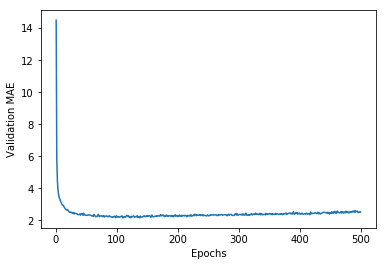

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

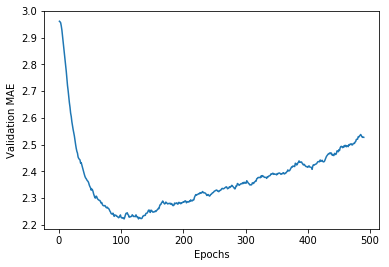

In [62]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point[0] * (1.0 - factor))
        else:
            smoothed_points.append(point[0])
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
